# Creación del modelo

In [21]:
import sys
from packaging import version
import sklearn
import tensorflow as tf
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
import pandas as pd
from sklearn.model_selection import train_test_split



In [22]:
# Carga de los datos
df = pd.read_csv("./NuevoData.csv", delimiter=',')

df_mdl = df[["LIMIT_BAL", "SEX", "AGE", "_1", "_2", "_3", "_4", "MARRIAGE_1", "MARRIAGE_2", "MARRIAGE_3", "default payment next month"]]


## Modelo MLP

In [23]:
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [24]:
X = df_mdl.iloc[:, :-1] 
Y = tf.keras.utils.to_categorical(df_mdl.iloc[:, -1], num_classes=2)

X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42)

In [25]:
X_train.shape

(18944, 10)

In [26]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 55        
                                                                 
 dense_1 (Dense)             (None, 2)                 12        
                                                                 
Total params: 67 (268.00 Byte)
Trainable params: 67 (268.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Optimizadores

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [29]:
historySGD = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100


592/592 [==============================] - 2s 3ms/step - loss: 12.3174 - accuracy: 0.7748 - val_loss: 0.6232 - val_accuracy: 0.7827
Epoch 2/100
592/592 [==============================] - 2s 3ms/step - loss: 0.6043 - accuracy: 0.7759 - val_loss: 0.5836 - val_accuracy: 0.7827
Epoch 3/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5752 - accuracy: 0.7759 - val_loss: 0.5607 - val_accuracy: 0.7827
Epoch 4/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5583 - accuracy: 0.7759 - val_loss: 0.5471 - val_accuracy: 0.7827
Epoch 5/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5483 - accuracy: 0.7759 - val_loss: 0.5388 - val_accuracy: 0.7827
Epoch 6/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5422 - accuracy: 0.7759 - val_loss: 0.5336 - val_accuracy: 0.7827
Epoch 7/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5385 - accuracy: 0.7759 - val_loss: 0.5303 - val_accuracy: 0.7827
Epoch 8/10

In [30]:
train_loss = historySGD.history['loss'] 
train_accuracy = historySGD.history['accuracy']  
valid_loss = historySGD.history['val_loss'] 
valid_accuracy = historySGD.history['val_accuracy']  

In [31]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 12.31742000579834, Training Accuracy: 0.7748099565505981
  Validation Loss: 0.6232122778892517, Validation Accuracy: 0.7827280163764954
Epoch 2:
  Training Loss: 0.6043109893798828, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5836120247840881, Validation Accuracy: 0.7827280163764954
Epoch 3:
  Training Loss: 0.5751526355743408, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5607377886772156, Validation Accuracy: 0.7827280163764954
Epoch 4:
  Training Loss: 0.5582716464996338, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5470731854438782, Validation Accuracy: 0.7827280163764954
Epoch 5:
  Training Loss: 0.5482786893844604, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5387941598892212, Validation Accuracy: 0.7827280163764954
Epoch 6:
  Training Loss: 0.5422456860542297, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5335806012153625, Validation Accuracy: 0.7827280163764954
Epoch 7:
  Training Los

#### Momentum

In [32]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [33]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [34]:
historySGDM = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
592/592 [==============================] - 2s 3ms/step - loss: 137657.1250 - accuracy: 0.7750 - val_loss: 0.5252 - val_accuracy: 0.7827
Epoch 2/100
592/592 [==============================] - 2s 3ms/step - loss: 0.5324 - accuracy: 0.7759 - val_loss: 0.5236 - val_accuracy: 0.7827
Epoch 3/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5236 - val_accuracy: 0.7827
Epoch 4/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5235 - val_accuracy: 0.7827
Epoch 5/100
592/592 [==============================] - 2s 3ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5237 - val_accuracy: 0.7827
Epoch 6/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5235 - val_accuracy: 0.7827
Epoch 7/100
592/592 [==============================] - 1s 2ms/step - loss: 0.5321 - accuracy: 0.7759 - val_loss: 0.5236 - val_accuracy: 0

In [35]:
train_loss = historySGDM.history['loss'] 
train_accuracy = historySGDM.history['accuracy']  
valid_loss = historySGDM.history['val_loss'] 
valid_accuracy = historySGDM.history['val_accuracy']  

In [36]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 137657.125, Training Accuracy: 0.7750211358070374
  Validation Loss: 0.5251956582069397, Validation Accuracy: 0.7827280163764954
Epoch 2:
  Training Loss: 0.5323540568351746, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5236323475837708, Validation Accuracy: 0.7827280163764954
Epoch 3:
  Training Loss: 0.5321263670921326, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.523642897605896, Validation Accuracy: 0.7827280163764954
Epoch 4:
  Training Loss: 0.5321317315101624, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5235294699668884, Validation Accuracy: 0.7827280163764954
Epoch 5:
  Training Loss: 0.5321221947669983, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.5236878991127014, Validation Accuracy: 0.7827280163764954
Epoch 6:
  Training Loss: 0.5321329236030579, Training Accuracy: 0.7758657336235046
  Validation Loss: 0.52354496717453, Validation Accuracy: 0.7827280163764954
Epoch 7:
  Training Loss: 0.53213

#### ADAGRAD

In [37]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [38]:
optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [39]:
historyADA = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
592/592 [==============================] - 2s 3ms/step - loss: 85719.2500 - accuracy: 0.2241 - val_loss: 75555.8672 - val_accuracy: 0.2173
Epoch 2/100
592/592 [==============================] - 1s 2ms/step - loss: 67516.1719 - accuracy: 0.2241 - val_loss: 62085.7422 - val_accuracy: 0.2173
Epoch 3/100
592/592 [==============================] - 1s 2ms/step - loss: 56116.9922 - accuracy: 0.2241 - val_loss: 51998.7891 - val_accuracy: 0.2173
Epoch 4/100
592/592 [==============================] - 1s 2ms/step - loss: 47096.1211 - accuracy: 0.2241 - val_loss: 43654.1289 - val_accuracy: 0.2173
Epoch 5/100
592/592 [==============================] - 1s 2ms/step - loss: 39438.4297 - accuracy: 0.2241 - val_loss: 36409.6250 - val_accuracy: 0.2173
Epoch 6/100
592/592 [==============================] - 2s 3ms/step - loss: 32688.1191 - accuracy: 0.2241 - val_loss: 29934.0938 - val_accuracy: 0.2173
Epoch 7/100
592/592 [==============================] - 1s 2ms/step - loss: 26594.6816 - accura

In [40]:
train_loss = historyADA.history['loss'] 
train_accuracy = historyADA.history['accuracy']  
valid_loss = historyADA.history['val_loss'] 
valid_accuracy = historyADA.history['val_accuracy']  

In [41]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 85719.25, Training Accuracy: 0.22413429617881775
  Validation Loss: 75555.8671875, Validation Accuracy: 0.21727195382118225
Epoch 2:
  Training Loss: 67516.171875, Training Accuracy: 0.22413429617881775
  Validation Loss: 62085.7421875, Validation Accuracy: 0.21727195382118225
Epoch 3:
  Training Loss: 56116.9921875, Training Accuracy: 0.22413429617881775
  Validation Loss: 51998.7890625, Validation Accuracy: 0.21727195382118225
Epoch 4:
  Training Loss: 47096.12109375, Training Accuracy: 0.22413429617881775
  Validation Loss: 43654.12890625, Validation Accuracy: 0.21727195382118225
Epoch 5:
  Training Loss: 39438.4296875, Training Accuracy: 0.22413429617881775
  Validation Loss: 36409.625, Validation Accuracy: 0.21727195382118225
Epoch 6:
  Training Loss: 32688.119140625, Training Accuracy: 0.22413429617881775
  Validation Loss: 29934.09375, Validation Accuracy: 0.21727195382118225
Epoch 7:
  Training Loss: 26594.681640625, Training Accuracy: 0.22413429617881

#### ADAM

In [42]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)))
model.add(tf.keras.layers.Dense(5, activation="relu"))
model.add(tf.keras.layers.Dense(2, activation="softmax"))

In [43]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9,
                                     beta_2=0.999)
model.compile(loss="categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [44]:
historyADM = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid))

Epoch 1/100
592/592 [==============================] - 2s 3ms/step - loss: 36.9852 - accuracy: 0.6864 - val_loss: 8.5873 - val_accuracy: 0.7827
Epoch 2/100
592/592 [==============================] - 2s 3ms/step - loss: 4.9406 - accuracy: 0.6788 - val_loss: 8.5563 - val_accuracy: 0.2173
Epoch 3/100
592/592 [==============================] - 2s 3ms/step - loss: 3.9622 - accuracy: 0.6809 - val_loss: 4.0426 - val_accuracy: 0.2173
Epoch 4/100
592/592 [==============================] - 2s 3ms/step - loss: 2.4032 - accuracy: 0.6759 - val_loss: 1.8942 - val_accuracy: 0.7827
Epoch 5/100
592/592 [==============================] - 1s 2ms/step - loss: 1.4864 - accuracy: 0.6748 - val_loss: 0.9475 - val_accuracy: 0.7821
Epoch 6/100
592/592 [==============================] - 2s 3ms/step - loss: 0.7767 - accuracy: 0.6856 - val_loss: 0.5446 - val_accuracy: 0.7663
Epoch 7/100
592/592 [==============================] - 1s 2ms/step - loss: 0.6844 - accuracy: 0.7185 - val_loss: 0.5370 - val_accuracy: 0.782

In [45]:
train_loss = historyADM.history['loss'] 
train_accuracy = historyADM.history['accuracy']  
valid_loss = historyADM.history['val_loss'] 
valid_accuracy = historyADM.history['val_accuracy']  

In [46]:
for epoch in range(len(train_loss)):
    print(f"Epoch {epoch+1}:")
    print(f"  Training Loss: {train_loss[epoch]}, Training Accuracy: {train_accuracy[epoch]}")
    print(f"  Validation Loss: {valid_loss[epoch]}, Validation Accuracy: {valid_accuracy[epoch]}")

Epoch 1:
  Training Loss: 36.985172271728516, Training Accuracy: 0.6864442825317383
  Validation Loss: 8.587262153625488, Validation Accuracy: 0.7827280163764954
Epoch 2:
  Training Loss: 4.940552711486816, Training Accuracy: 0.6787900924682617
  Validation Loss: 8.556319236755371, Validation Accuracy: 0.21727195382118225
Epoch 3:
  Training Loss: 3.9622154235839844, Training Accuracy: 0.6809015870094299
  Validation Loss: 4.042611598968506, Validation Accuracy: 0.21727195382118225
Epoch 4:
  Training Loss: 2.4031715393066406, Training Accuracy: 0.6758868098258972
  Validation Loss: 1.8942384719848633, Validation Accuracy: 0.7827280163764954
Epoch 5:
  Training Loss: 1.4863942861557007, Training Accuracy: 0.6748310923576355
  Validation Loss: 0.9474893808364868, Validation Accuracy: 0.7820945978164673
Epoch 6:
  Training Loss: 0.7767313122749329, Training Accuracy: 0.685599684715271
  Validation Loss: 0.5445697903633118, Validation Accuracy: 0.7662584185600281
Epoch 7:
  Training Loss:

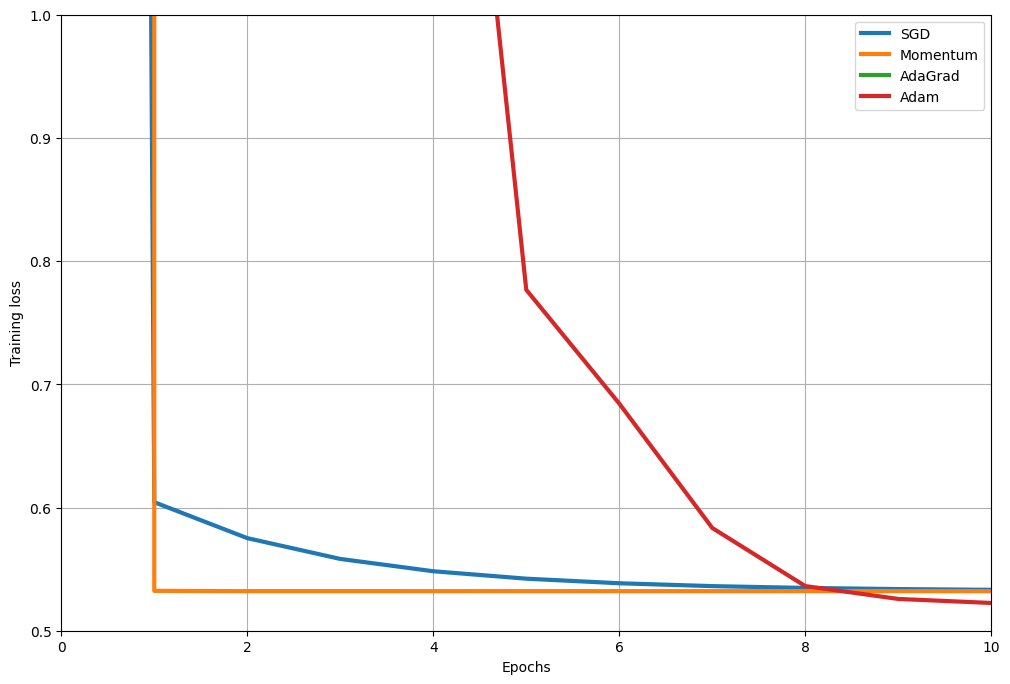

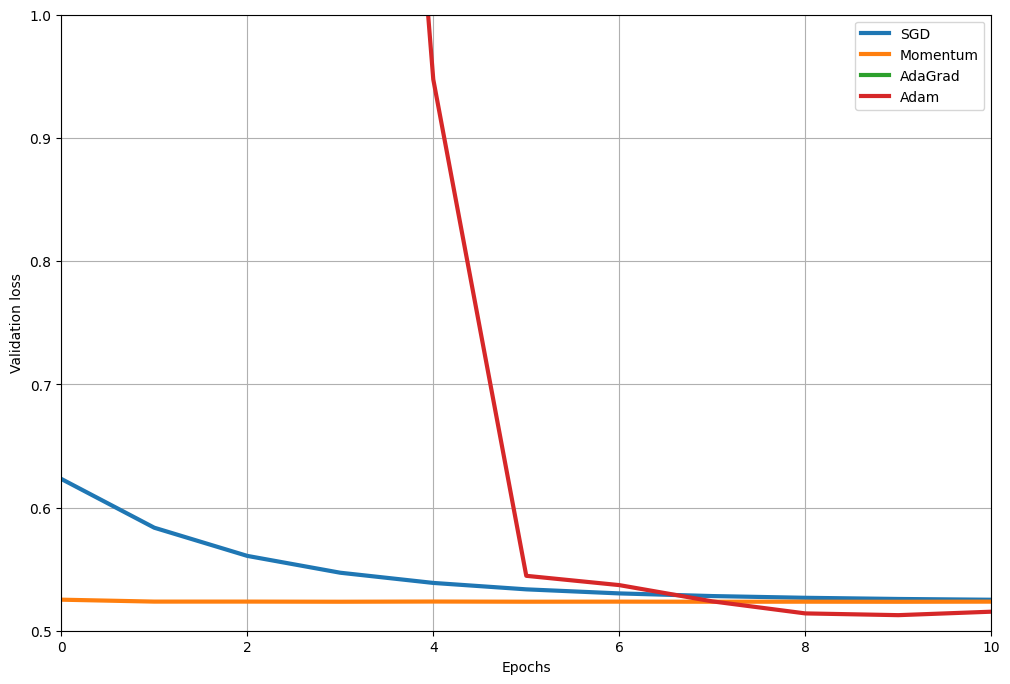

In [47]:
import matplotlib.pyplot as plt
for loss in ("loss", "val_loss"):
    plt.figure(figsize=(12, 8))
    opt_names = "SGD Momentum AdaGrad Adam"
    for history, opt_name in zip((historySGD, historySGDM,
                                  historyADA, historyADM,
                                 ),
                                 opt_names.split()):
        plt.plot(history.history[loss], label=f"{opt_name}", linewidth=3)

    plt.grid()
    plt.xlabel("Epochs")
    plt.ylabel({"loss": "Training loss", "val_loss": "Validation loss"}[loss])
    plt.legend(loc="upper right")
    plt.axis([0, 10, 0.5, 1])
    plt.show()

### Guardar el modelo

In [49]:
#Guardar ultimo modelo que fue el mejor
model.save("model.h5")